# **Ejercicio: Predicción de Diabetes con Machine Learning**
Un centro médico de investigación quiere desarrollar un modelo que prediga si una paciente tiene diabetes en base a 8 variables clínicas:

* Número de embarazos
* Glucosa en sangre
* Presión arterial
* Espesor de piel
* Insulina
* Índice de masa corporal (IMC)
* Función hereditaria de diabetes
* Edad

El objetivo es clasificar a cada paciente como:

* 1: Tiene diabetes
* 0: No tiene diabetes

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "diabetes.csv"

# Cargar la última versión
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mathchi/diabetes-data-set",
  file_path,
)

print("Primeros 5 registros:", df.head())

/tmp/ipython-input-617771405.py:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


Primeros 5 registros:    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## **Análisis Exploratorio de Datos**
Conocer el dataset antes de entrenar el modelo y eliminar cualquier dato atipico que no tenga sentido para la clasificación

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None


Estadistica:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



Valores faltantes:


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


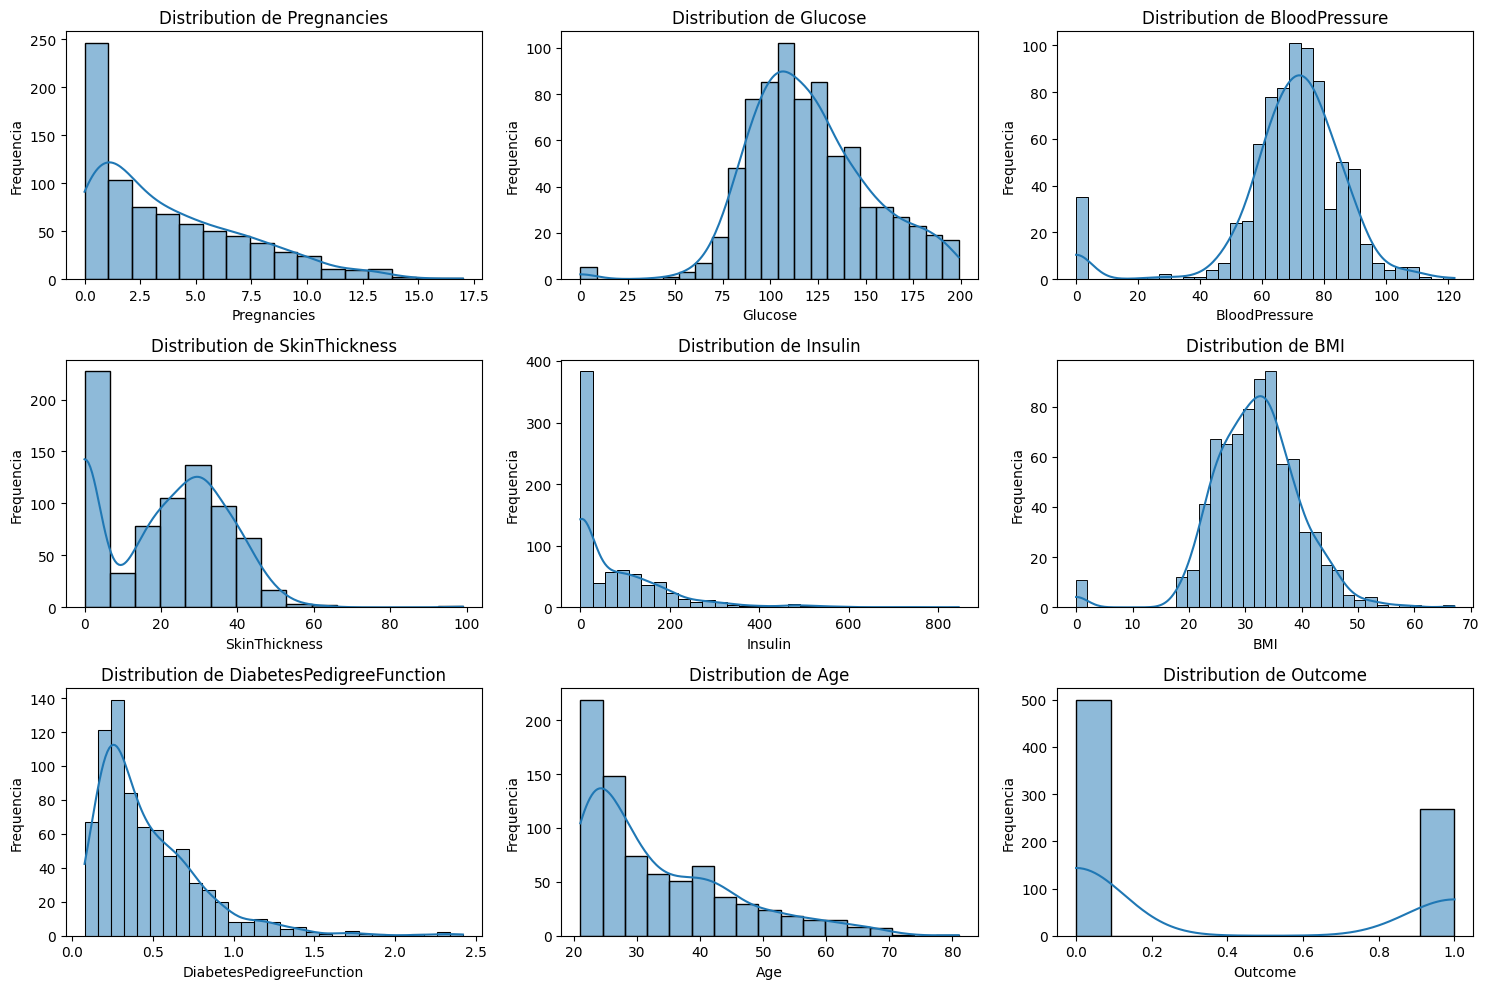

In [ ]:
# Muestra la información del dataset
print("Info Dataset:")
display(df.info())

# Muestra las estadisticas
print("\nEstadistica:")
display(df.describe())

# Muestra los valores faltantes
print("\nValores faltantes:")
display(df.isnull().sum())

# Muestra la distribución de la base de datos
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequencia')

plt.tight_layout()
plt.show()

## **Preprocesamiento**
Aplicar tecnicas como escalamiento, conversion de variables categoricas a variables numéricas, eliminar nulos y duplicados, etc.

In [ ]:
# Revisar duplicados
print("Número de filas duplicadas:", df.duplicated().sum())

Número de filas duplicadas: 0


In [ ]:
# Verificamos las clases existentes
df['Outcome'].unique()

array([1, 0])

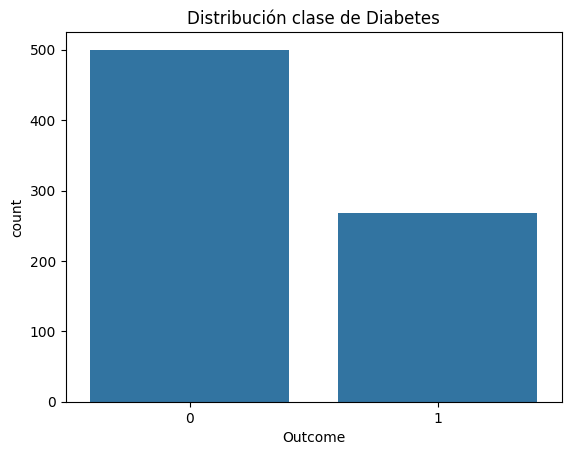

In [ ]:
#Graficamos las clases existentes
sns.countplot(x='Outcome', data=df)
plt.title('Distribución clase de Diabetes')
plt.show()

In [ ]:
#Para entrenar los datos, tomamos todas las variables a trabajar, en este caso son variables numéricas. Se elimina la columna Outcome ya que esta indica la clase de la base de datos.
X = df.drop('Outcome', axis=1)

## **Separar datos en entrenamiento y prueba**
* Definir X (todas las columnas excepto la etiqueta) y y (la columna Outcome, que indica diabetes).
* Usar train_test_split de sklearn.model_selection para dividir el dataset:

In [ ]:
# Se escala la base de datos con StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
y = df['Outcome']
# Se separa la base de datos escaladas con la función train_test_split
# Se determina que el tamaño de la base de datos para entrenamiento es de 80% y de test 20%
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Se verifica el tamaño de los datos obtenidos para entrenamiento
X_train.shape

(614, 8)

In [ ]:
# Se verifica el tamaño de los datos obtenidos para test
X_test.shape

(154, 8)

## **Entrenamiento**
Elegir un modelo de clasificación inicial. Opciones sugeridas:

* Regresión Logística
* Random Forest
* K-Nearest Neighbors (KNN)

Entrenar el modelo con los datos de entrenamiento  usando .fit().

In [ ]:
#Se importan las funciones necesarias para el entrenamiento del modelo.
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [ ]:
# Se determina el modelo de Random Forest para trabajar la base de datos
# Su nombre, "bosque aleatorio", da una pista de cómo funciona: construye múltiples árboles de decisión y los combina para obtener un resultado más preciso y estable.
model_random = RandomForestClassifier()

In [ ]:
# Se realiza el entrenamiento del modelo con la base de datos train
model_random.fit(X_train,y_train)

RandomForestClassifier()

## **Predicción**
* Usar el modelo entrenado para predecir el conjunto de prueba (X_test) con .predict().
* Guardar las predicciones en una variable y_pred.

In [ ]:
# Con la función predict se realiza la predicción del modelo con la base de dato de test
y_pred=model_random.predict(X_test)

## **Evaluación**
Calcular las métricas principales usando sklearn.metrics

Matriz de confusión:


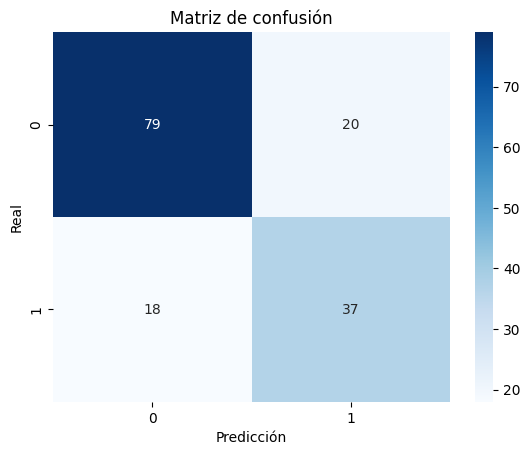



Resultados para el modelo:
  Accuracy: 0.7532467532467533
  Recall: 0.6727272727272727
  F1-score: 0.6607142857142857
  Precision: 0.6491228070175439
--------------------


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()
print("\n")
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Resultados para el modelo:")
print(f"  Accuracy: {accuracy}")
print(f"  Recall: {recall}")
print(f"  F1-score: {f1}")
print(f"  Precision: {precision}")
print("-" * 20)

De los resultados obtenidos:

* Accuracy indica que el modelo predijo correctamente el resultado para el 72% de los pacientes del grupo de prueba.
* Para mejorar el modelo, se sugiere utilizar hiperparametros y/o probar otros modelos como Regresión Logistica o KNN.
* En la matriz de confusión se evidencia que el modelo presenta altos falsos positivos, por lo que no es un modelo tan confiable, eso se evidencia en la precisión del modelo, la cual mide qué proporción de pacientes que el modelo predijo como diabéticos realmente tenían diabetes.
